<a href="https://colab.research.google.com/github/angeruzzi/Python/blob/main/Projeto_Flai_Album_de_Figurinhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJETO: ALBUM FIGURINHA

*   Total de cromos: **212**
*   Preço do livro ilustrado capa brochura: **R$10,00**
*   Envelope com 4 cromos: **R$4,00**

#SUPOSIÇÕES

1.   Todas as figurinhas tem igual probabiidade de serem sorteadas.
2.   Um pacotinho é comprado por vez até que se complete o álbum.

#ALGORITMO

1.   Comprar um pacotinho de figurinhas (4 figurinhas cada, que podem ser repetidas);
2.   Colar no álbum e verificar se o álbum está completo;
3.   Caso esteja incompleto, comprar mais um pacotinho, caso contrário, terminar

#PERGUNTAS

1.   Qual o valor médio investido para completar o álbum nessas condições?
2.   Quantos pacotes são necessários comprar, em média, para completar o álbum?
3.   Qual é a distribuição empírica do valor investido para completar o álbum?
4.   Qual a probabilidade de se gastar menos que R$1.500,00 para completar o álbum?
5.   Qual a probabilidade de se gastar mais do que a média para completar o álbum?
6.   Qual é um intervalo de confiança de 95% para o gasto ao se completar o álbum?
7.   Qual o valor médio gasto caso se esteja completando o álbum com mais de um amigo?
8.   Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos?


In [ ]:
import numpy as np

In [ ]:
n_album = 212
preco_pacote = 4
cromos_por_pacote = 4
preco_album = 10

##Passos

In [ ]:
#Criar album
album = np.zeros(n_album)

In [ ]:
#Comprar Pacote
pacotinho = np.random.choice(np.arange(0,n_album), size =4)
pacotinho

array([5, 0, 0, 4])

In [ ]:
#colar no album

album[pacotinho[0]] += 1
album[pacotinho[1]] += 1
album[pacotinho[2]] += 1
album[pacotinho[3]] += 1
album


array([2., 3., 3., 3., 5., 3., 1.])

In [ ]:
not np.all(album >= 1)

False

#Implementação final

In [ ]:
def SimulaAlbum():
  #Criar album
  album = np.zeros(n_album)
  pacotes = 0;

  while True:
    #Comprar Pacote
    pacotinho = np.random.choice(np.arange(0,n_album), size =4)
    pacotes += 1
    for i in [0, 1, 2, 3]:
      #colar no album
      album[pacotinho[i]] += 1
    
    if np.all(album >= 1):
      break

  custo = pacotes*preco_pacote + preco_album
  return custo

In [ ]:
#SIMULAÇÃO
s = 10000
resultados = []
for i in range(s):
  resultados.append (SimulaAlbum())

sim = np.array(resultados)

In [ ]:
# QUESTÃO 1: VALOR MÉDIO
sim.mean()

1271.564

In [ ]:
#QUESTÃO 2: QTD DE PACOTES
(sim.mean()-preco_album) / preco_pacote

315.391

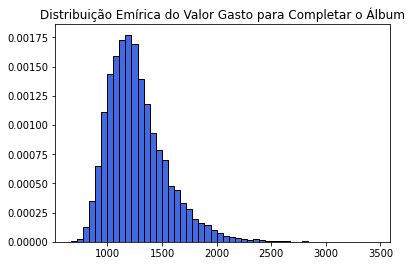

In [ ]:
#QUESTÃO 3: DISTRIBUIÇÃO
import matplotlib.pyplot as plt

plt.hist(sim, bins = 50, density = True, color = 'royalblue', edgecolor = 'black')
plt.title('Distribuição Emírica do Valor Gasto para Completar o Álbum')
plt.show()

In [ ]:
#QUESTÃO 4: Qual a probabilidade de se gastar menos que R$1.500,00 para completar o álbum?
prob1 = sum(np.array(sim) < 1500) / s
print('A probabilidade de se gastar menos de 1500 é {:.2f}%'.format(prob1*100))

A probabilidade de se gastar menos de 1500 é 82.40%


In [ ]:
#QUESTÃO 5:  Qual a probabilidade de se gastar mais do que a média para completar o álbum?
prob2 = sum(np.array(sim) > np.array(sim).mean()) / s
print('A probabilidade de se gastar mais do que a média é {:.2f}%'.format(prob2*100))


A probabilidade de se gastar mais do que a média é 42.25%


In [ ]:
#QUESTÃO 6:  Qual é um intervalo de confiança de 95% para o gasto ao se completar o álbum?
qts = np.quantile(sim, [0.025, 0.975])
qts


array([ 878., 1926.])

In [ ]:
#QUESTÃO 7: Qual o valor médio gasto caso se esteja completando o álbum com mais de um amigo?

def SimulaAlbumPlus(n_amigos):
  #Criar album
  album = np.zeros(n_album)
  pacotes = 0;

  while True:
    #Comprar Pacote
    pacotinho = np.random.choice(np.arange(0,n_album), size =4)
    pacotes += 1
    for i in [0, 1, 2, 3]:
      #colar no album
      album[pacotinho[i]] += 1
    
    if np.all(album >= n_amigos):
      break

  custo = pacotes*preco_pacote + preco_album
  return custo/n_amigos


In [ ]:
#SIMULAÇÃO
s2 = 10000
resultados2 = []
for i in range(s2):
  resultados2.append(SimulaAlbumPlus(2))

sim2 = np.array(resultados2)



In [ ]:
sim2.mean()

867.025

In [ ]:
#QUESTÃO 7: Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos?
#SIMULAÇÃO
s3 = 10000
resultados3 = []
for i in range(s3):
  resultados3.append(SimulaAlbumPlus(3))

sim3 = np.array(resultados2)

In [105]:
sim3.mean()

867.025